<a href="https://colab.research.google.com/github/akbarsaputrait/computer-vision/blob/main/neural_network/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# Download dataset from my google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [52]:
import os
base_dir = 'gdrive/MyDrive/jambu_and_seledri'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_jambu_dir = os.path.join(train_dir, 'daun_jambu_biji')
train_seledri_dir = os.path.join(train_dir, 'daun_seledri')

validation_jambu_dir = os.path.join(validation_dir, 'daun_jambu_biji')
validation_seledri_dir = os.path.join(validation_dir, 'daun_seledri')

In [53]:
# Cek penamaan image yang ada di folder train_jambu_dir dan train_seledri_dir
print(os.listdir(train_jambu_dir)[:10])
print(os.listdir(train_seledri_dir)[:10])

['002.JPG', '001.JPG', '006.JPG', '005.JPG', '004.JPG', '003.JPG', '009.JPG', '008.JPG', '007.JPG', '012.JPG']
['051.JPG', '055.JPG', '054.JPG', '053.JPG', '052.JPG', '060.JPG', '059.JPG', '058.JPG', '057.JPG', '056.JPG']


In [54]:
# Cek jumlah data train dan data validation
print('total training daun jambu biji images:', len(os.listdir(train_jambu_dir)))
print('total training daun seledri images:', len(os.listdir(train_seledri_dir)))
print('total validation daun jambu biji images:', len(os.listdir(validation_jambu_dir)))
print('total validation daun seledri images:', len(os.listdir(validation_seledri_dir)))

total training daun jambu biji images: 40
total training daun seledri images: 40
total validation daun jambu biji images: 10
total validation daun seledri images: 10


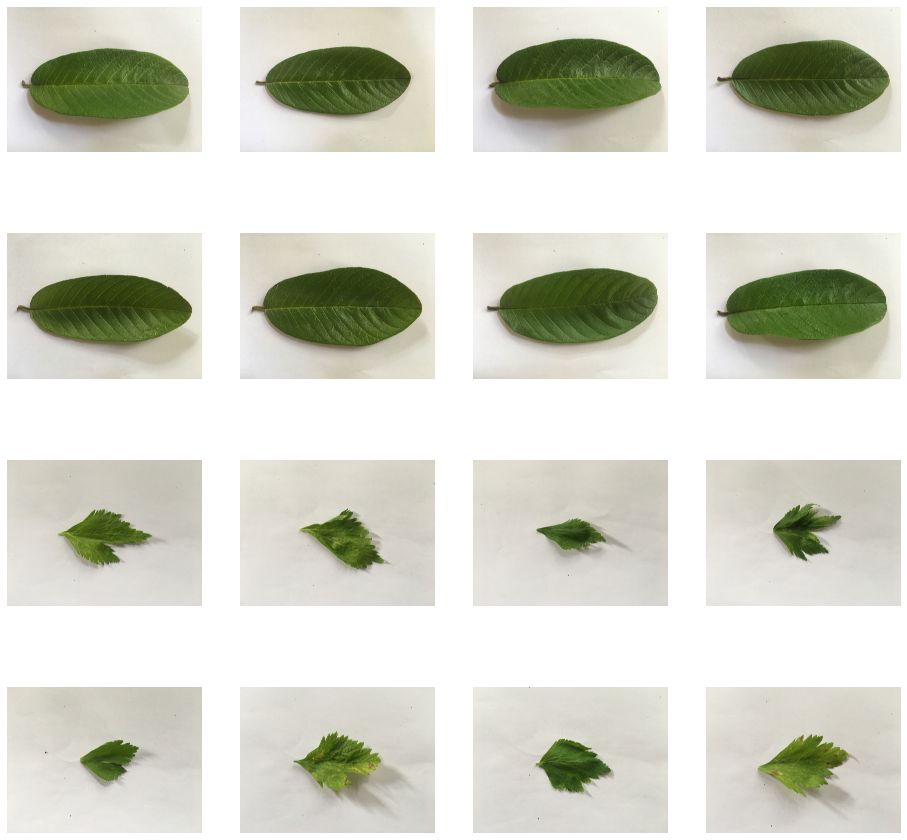

In [55]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_jambu_dir, fname) 
                for fname in os.listdir(train_jambu_dir)[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_seledri_dir, fname) 
                for fname in os.listdir(train_seledri_dir)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [56]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [57]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

<h3>Data Preprocessing</h3>

In [58]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (30, 150, 150, 3)
Train Label =  (30,)
Validation Data =  (20, 150, 150, 3)
Validation Label =  (20,)


In [59]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [227 220 221]
Data setelah di-normalisasi  [0.8901961 0.8627451 0.8666667]


In [60]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  []
Label setelah di-encoder  []


<h3>Definisikan Model</h3>

In [61]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [62]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(128, activation='relu')(x) # hidden layer 1 dengan 128 neuron
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

In [63]:
# Tampilkan model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 flatten_1 (Flatten)         (None, 67500)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               8640128   
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 8,640,257
Trainable params: 8,640,257
Non-trainable params: 0
_________________________________________________________________


In [64]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [65]:
H = model.fit(x_train, y_train, batch_size=20, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
2/2 [==============================] - 1s 208ms/step - loss: 37.2660 - acc: 0.4333 - val_loss: 58.7860 - val_acc: 0.5000
Epoch 2/50
2/2 [==============================] - 0s 70ms/step - loss: 44.6279 - acc: 0.5000 - val_loss: 1.6328 - val_acc: 0.5000
Epoch 3/50
2/2 [==============================] - 0s 69ms/step - loss: 1.5335 - acc: 0.5000 - val_loss: 0.8297 - val_acc: 0.5000
Epoch 4/50
2/2 [==============================] - 0s 70ms/step - loss: 0.8211 - acc: 0.4333 - val_loss: 0.7980 - val_acc: 0.5000
Epoch 5/50
2/2 [==============================] - 0s 72ms/step - loss: 0.7757 - acc: 0.5000 - val_loss: 0.6787 - val_acc: 0.5000
Epoch 6/50
2/2 [==============================] - 0s 83ms/step - loss: 0.6269 - acc: 0.5333 - val_loss: 0.4591 - val_acc: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 72ms/step - loss: 0.4539 - acc: 0.9667 - val_loss: 0.4743 - val_acc: 0.6000
Epoch 8/50
2/2 [==============================] - 0s 69ms/step - loss: 0.4588 - acc: 0.6667 -

<h3>Evaluasi Model</h3>

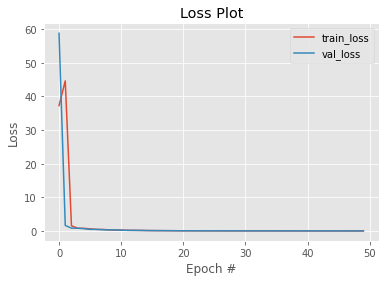

In [66]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

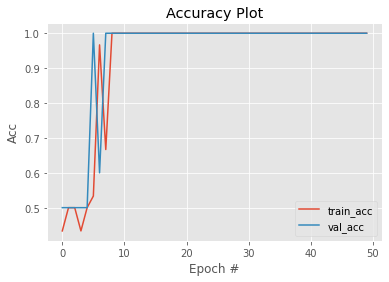

In [67]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [68]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

